### Solar system simulation for one million years
N-body simulations can help us to understand the evolution of our solar system.
Let's try to simulate it with different algorithms and visualize its secular evolution.

### Import libraries
First, we import some libraries. If the path is wrong, please correct it manually.

In [1]:
import sys
from pathlib import Path

parent_path = str(Path.cwd().parent)
sys.path.append(parent_path)
print(f"Appended path: \"{parent_path}\"")

import numpy as np

from gravity_sim import GravitySimulatorAPI

Appended path: "/Users/alvinng/Desktop/cuhk/gravity-simulator/Final Project/gravity-simulator"


In [ ]:
colors = [
    "orange",
    "slategrey",
    "wheat",
    "skyblue",
    "red",
    "darkgoldenrod",
    "gold",
    "paleturquoise",
    "blue",   
]
labels = [
    "Sun",
    "Mercury",
    "Venus",
    "Earth",
    "Mars",
    "Jupiter",
    "Saturn",
    "Uranus",
    "Neptune",
]

### WHFast
We will start with the WHFast algorithm. This algorithm is symplectic (conserves energy over long simulation period). It is suitable for stable systems like our solar system.

We start with $\text{d}t = 5.0 \text{ days}$. For most computers, it should only take a few minutes.

In [2]:
grav_sim = GravitySimulatorAPI()
system = grav_sim.create_system()
system.load("solar_system")

sol_state, sol_time, sol_dt = grav_sim.launch_simulation(
    gravitational_system=system,
    integrator="whfast",
    tf=grav_sim.years_to_days(1000000.0),
    dt=5.0,
    storing_freq=2000,
)

Output()

Simulation information
System:  solar_system
Integrator:  WHFast
tf: 365242189.0 days
dt: 5.0 days
tolerance:  None
store_every_n:  2000
acceleration_method:  pairwise
storing_method:  default
flush_results_path:  None
no_progress_bar:  False
no_print:  False
softening_length:  0.0
Simulating the system...


Run time: 76.673 s



#### Data analysis
Let's plot the relative energy error. We can see that the error is bounded within $5 \times 10^{-8}$ even over 1 million years!

Output()

Computing energy...


Run time: 0.109 s



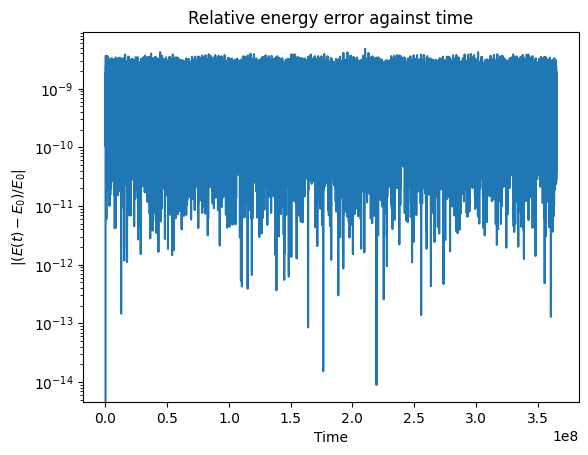

In [3]:
grav_sim.compute_and_plot_rel_energy_error(
    system=system,
    sol_state=sol_state,
    sol_time=grav_sim.days_to_years(sol_time),
    xlabel="Time (years)",
)

### Secular evolution
We can visualize the secular evolution of the solar system over 1 million years by plotting their eccentricity and inclination.

Computing eccentricity (Assuming the first body is the central star)...
Run time: 0.043 s



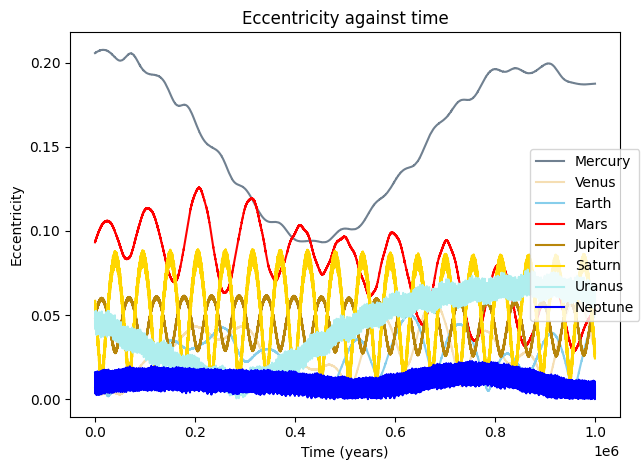

Computing inclination (Assuming the first body is the central star)...
Run time: 0.046 s



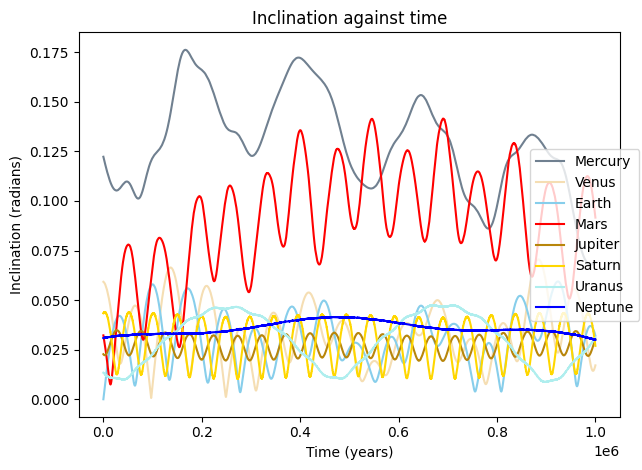

In [4]:
grav_sim.compute_and_plot_eccentricity(
    system=system,
    sol_state=sol_state,
    sol_time=grav_sim.days_to_years(sol_time),
    xlabel="Time (years)",
    colors=colors[1:],  # Exclude the Sun
    labels=labels[1:],  # Exclude the Sun
    legend=True,
)
grav_sim.compute_and_plot_inclination(
    system=system,
    sol_state=sol_state,
    sol_time=grav_sim.days_to_years(sol_time),
    xlabel="Time (years)",
    ylabel="Inclination (degrees)",
    colors=colors[1:],  # Exclude the Sun
    labels=labels[1:],  # Exclude the Sun
    legend=True,
)

### Comparison between algorithms
Now, we can compare WHFast with other algorithms.

#### IAS15
IAS15 is a high order integrator with extreme accuracy. However, running this may take 2 hours - 10 hours, depending on your computer.

In [5]:
system = grav_sim.create_system()
system.load("solar_system")

sol_state, sol_time, sol_dt = grav_sim.launch_simulation(
    gravitational_system=system,
    integrator="ias15",
    tf=grav_sim.years_to_days(1000000.0),
    tolerance=1e-9,
    storing_freq=5000,
)

Output()

Simulation information
System:  solar_system
Integrator:  IAS15
tf: 365242189.0 days
dt: None days
tolerance:  1e-09
store_every_n:  5000
acceleration_method:  pairwise
storing_method:  default
flush_results_path:  None
no_progress_bar:  False
no_print:  False
softening_length:  0.0
Simulating the system...


Run time: 6968.865 s



#### Data analysis
Here, the energy error is not bounded like WHFast, but it is growing very slowly! After 1 million years, the error remains in the order of $10^{-14}$. This is due to the accuracy of IAS15 and our effort in reducing round-off error by compensated summation.

Output()

Computing energy...


Run time: 0.116 s



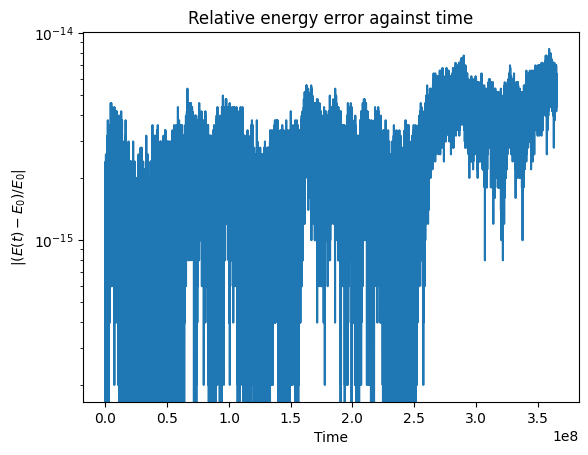

In [6]:
grav_sim.compute_and_plot_rel_energy_error(
    system=system,
    sol_state=sol_state,
    sol_time=grav_sim.days_to_years(sol_time),
    xlabel="Time (years)",
)

#### Secular evolution
Comparing the secular evolution with WHFast, we can see that they agree with each other.

Computing eccentricity (Assuming the first body is the central star)...
Run time: 0.090 s



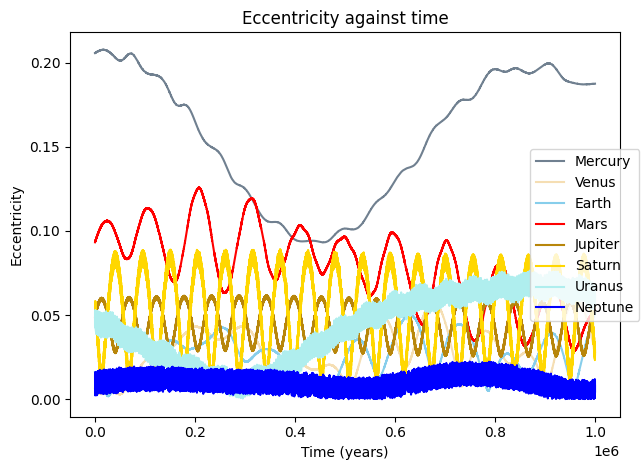

Computing inclination (Assuming the first body is the central star)...
Run time: 0.286 s



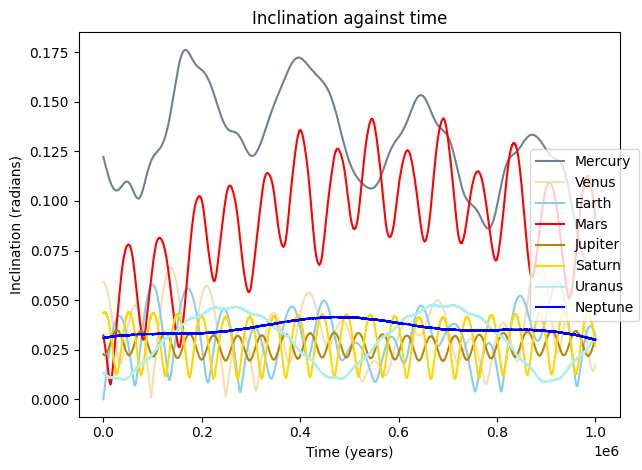

In [7]:
grav_sim.compute_and_plot_eccentricity(
    system=system,
    sol_state=sol_state,
    sol_time=grav_sim.days_to_years(sol_time),
    xlabel="Time (years)",
    colors=colors[1:],  # Exclude the Sun
    labels=labels[1:],  # Exclude the Sun
    legend=True,
)
grav_sim.compute_and_plot_inclination(
    system=system,
    sol_state=sol_state,
    sol_time=grav_sim.days_to_years(sol_time),
    xlabel="Time (years)",
    ylabel="Inclination (degrees)",
    colors=colors[1:],  # Exclude the Sun
    labels=labels[1:],  # Exclude the Sun
    legend=True,
)

#### LeapFrog (Velocity Verlet)
LeapFrog is a very popular symplectic method. It conserves energy and is very simple to implement. Let us try $\text{d}t = 0.5 \text{ days}$. The run time should be very close to WHFast with $\text{d}t = 5.0 \text{ days}$.

In [8]:
system = grav_sim.create_system()
system.load("solar_system")

sol_state, sol_time, sol_dt = grav_sim.launch_simulation(
    gravitational_system=system,
    integrator="leapfrog",
    tf=grav_sim.years_to_days(1000000.0),
    dt=0.5,
    storing_freq=50000,
)

Output()

Simulation information
System:  solar_system
Integrator:  LeapFrog
tf: 365242189.0 days
dt: 0.5 days
tolerance:  None
store_every_n:  50000
acceleration_method:  pairwise
storing_method:  default
flush_results_path:  None
no_progress_bar:  False
no_print:  False
softening_length:  0.0
Simulating the system...


Run time: 141.401 s



#### Data analysis
Again, we can see the relative energy error is bounded! However, for the secular evolution, we can see that the eccentricity does not agree IAS15 and WHFast for terrestrial planets (Mercury - Mars). Inclination, on the other hand, agrees relatively well except for Mercury.

Output()

Computing energy...


Run time: 0.172 s



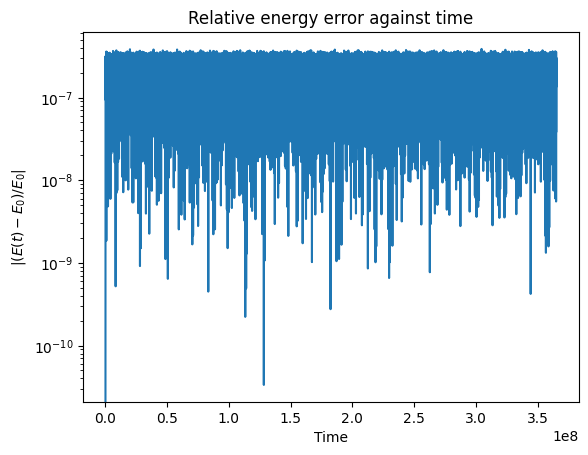

Computing eccentricity (Assuming the first body is the central star)...
Run time: 0.013 s



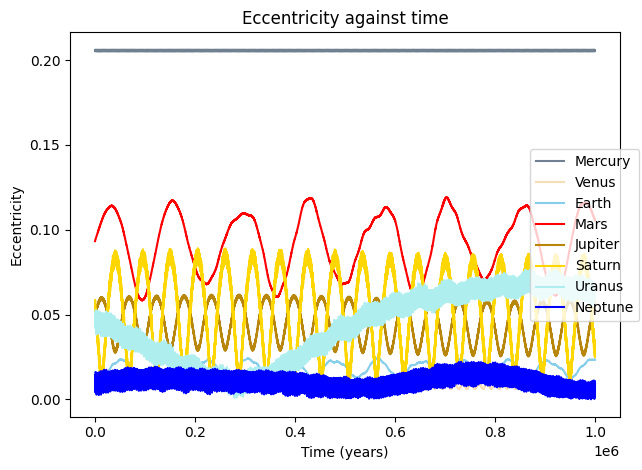

Computing inclination (Assuming the first body is the central star)...
Run time: 0.017 s



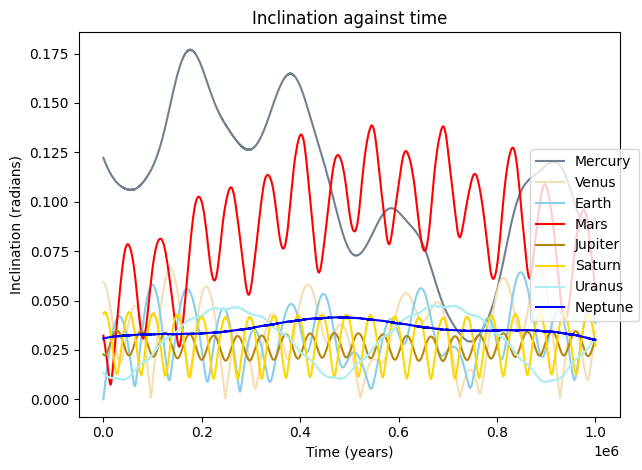

In [9]:
grav_sim.compute_and_plot_rel_energy_error(
    system=system,
    sol_state=sol_state,
    sol_time=grav_sim.days_to_years(sol_time),
    xlabel="Time (years)",
)
grav_sim.compute_and_plot_eccentricity(
    system=system,
    sol_state=sol_state,
    sol_time=grav_sim.days_to_years(sol_time),
    xlabel="Time (years)",
    colors=colors[1:],  # Exclude the Sun
    labels=labels[1:],  # Exclude the Sun
    legend=True,
)
grav_sim.compute_and_plot_inclination(
    system=system,
    sol_state=sol_state,
    sol_time=grav_sim.days_to_years(sol_time),
    xlabel="Time (years)",
    ylabel="Inclination (degrees)",
    colors=colors[1:],  # Exclude the Sun
    labels=labels[1:],  # Exclude the Sun
    legend=True,
)

Let's try a smaller $\text{d}t = 0.1 \text{ days}$ and see if the result improves.

In [10]:
system = grav_sim.create_system()
system.load("solar_system")

sol_state, sol_time, sol_dt = grav_sim.launch_simulation(
    gravitational_system=system,
    integrator="leapfrog",
    tf=grav_sim.years_to_days(1000000.0),
    dt=0.1,
    storing_freq=50000,
)

Output()

Simulation information
System:  solar_system
Integrator:  LeapFrog
tf: 365242189.0 days
dt: 0.1 days
tolerance:  None
store_every_n:  50000
acceleration_method:  pairwise
storing_method:  default
flush_results_path:  None
no_progress_bar:  False
no_print:  False
softening_length:  0.0
Simulating the system...


Run time: 772.248 s



#### Data Analysis
Unfortunately, the round-off error starts to build up as we used a very small $\text{d}t$. The energy error is no longer bounded and the secular evolution became unstable for all planets.

Output()

Computing energy...


Run time: 0.122 s



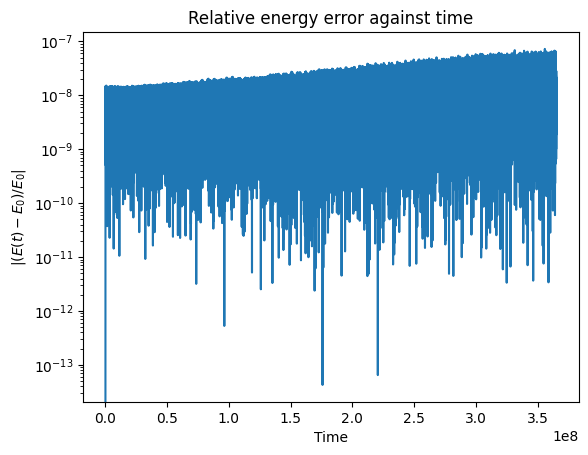

Computing eccentricity (Assuming the first body is the central star)...
Run time: 0.077 s



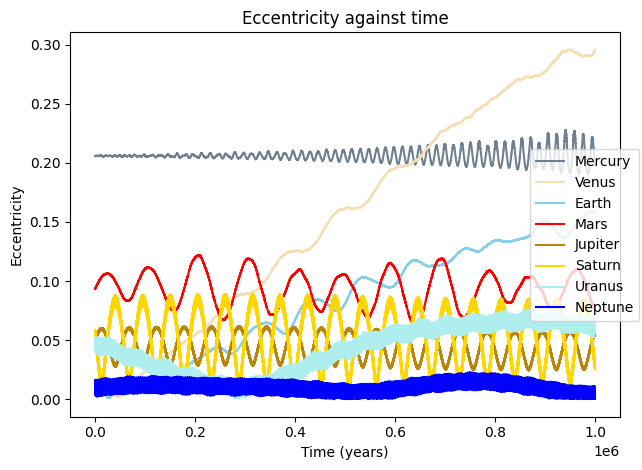

Computing inclination (Assuming the first body is the central star)...
Run time: 0.068 s



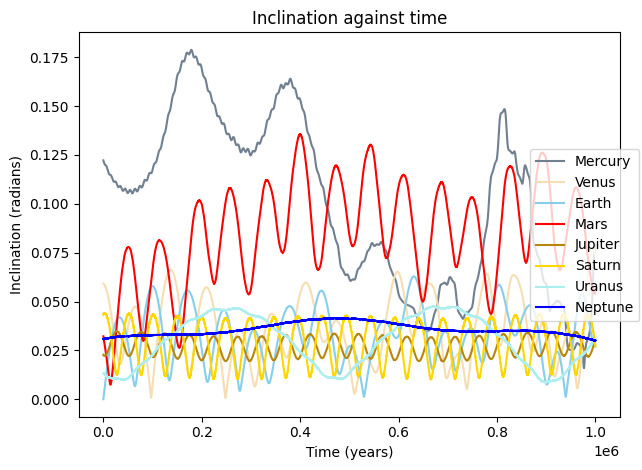

In [11]:
grav_sim.compute_and_plot_rel_energy_error(
    system=system,
    sol_state=sol_state,
    sol_time=grav_sim.days_to_years(sol_time),
    xlabel="Time (years)",
)

grav_sim.compute_and_plot_eccentricity(
    system=system,
    sol_state=sol_state,
    sol_time=grav_sim.days_to_years(sol_time),
    xlabel="Time (years)",
    colors=colors[1:],  # Exclude the Sun
    labels=labels[1:],  # Exclude the Sun
    legend=True,
)
grav_sim.compute_and_plot_eccentricity(
    system=system,
    sol_state=sol_state,
    sol_time=grav_sim.days_to_years(sol_time),
    xlabel="Time (years)",
    ylabel="Inclination (degrees)",
    colors=colors[1:],  # Exclude the Sun
    labels=labels[1:],  # Exclude the Sun
    legend=True,
)

#### RK4
RK4 is another popular n-body algorithm, which has a good balance on computational cost and accuracy. Since it does not conserve energy, it is not suitable for long term simulations. 

We will use $\text{d}t = 0.5 \text{ days}$.

In [12]:
system = grav_sim.create_system()
system.load("solar_system")

sol_state, sol_time, sol_dt = grav_sim.launch_simulation(
    gravitational_system=system,
    integrator="rk4",
    tf=grav_sim.years_to_days(1000000.0),
    dt=0.5,
    storing_freq=50000,
)

Output()

Simulation information
System:  solar_system
Integrator:  RK4
tf: 365242189.0 days
dt: 0.5 days
tolerance:  None
store_every_n:  50000
acceleration_method:  pairwise
storing_method:  default
flush_results_path:  None
no_progress_bar:  False
no_print:  False
softening_length:  0.0
Simulating the system...


Run time: 460.116 s



#### Data analysis
We can see that the energy error goes up to $10^{-4}$, which is not ideal. Nevertheless, looking at the secular evolution, we can see that it performed a lot better than LeapFrog.

Output()

Computing energy...


Run time: 0.119 s



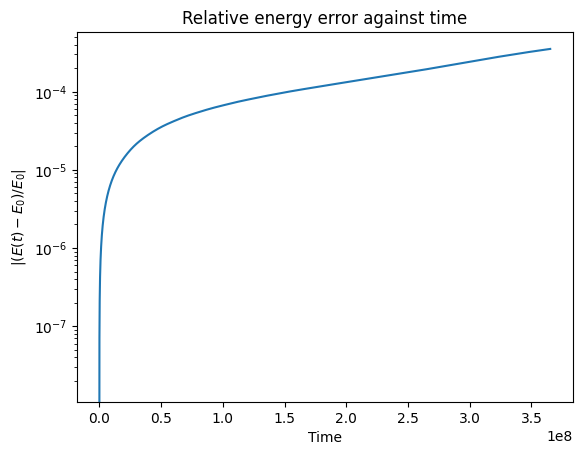

In [13]:
grav_sim.compute_and_plot_rel_energy_error(
    system=system,
    sol_state=sol_state,
    sol_time=grav_sim.days_to_years(sol_time),
    xlabel="Time (years)",
)

Computing eccentricity (Assuming the first body is the central star)...
Run time: 0.014 s



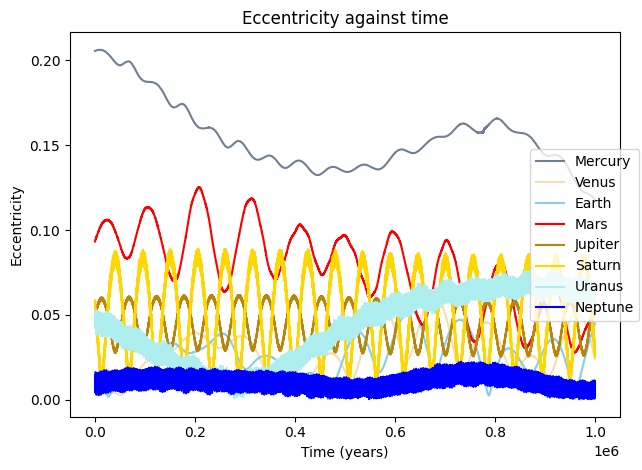

Computing inclination (Assuming the first body is the central star)...
Run time: 0.019 s



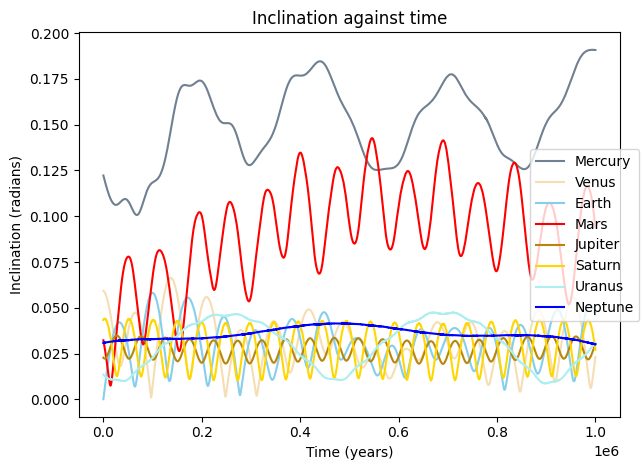

In [14]:
grav_sim.compute_and_plot_eccentricity(
    system=system,
    sol_state=sol_state,
    sol_time=grav_sim.days_to_years(sol_time),
    xlabel="Time (years)",
    colors=colors[1:],  # Exclude the Sun
    labels=labels[1:],  # Exclude the Sun
    legend=True,
)
grav_sim.compute_and_plot_inclination(
    system=system,
    sol_state=sol_state,
    sol_time=grav_sim.days_to_years(sol_time),
    xlabel="Time (years)",
    ylabel="Inclination (degrees)",
    colors=colors[1:],  # Exclude the Sun
    labels=labels[1:],  # Exclude the Sun
    legend=True,
)

# END